In [12]:
data_final = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/suyashlakhani/tweets2")

**5. What are the timelines of these tweets? Do you see significant peaks and valleys?**

**5.1 Do you see any data collection gaps?**

**5.2 Plot the timelines of these tweets**

In [13]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pyspark.sql.functions as F
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import split
pd.set_option("max_colwidth", 100)

from IPython.display import clear_output
clear_output(wait = False)

from google.cloud import storage

spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [14]:
data_final.limit(2).toPandas()

,created_at,user,user_id,user_name,user_description,followers_count,quote_count,retweeted_status,retweet_count,favorite_count,text,verified_user,user_location
0,Wed Aug 24 17:29:41 +0000 2022,"(False, Mon Oct 04 18:02:23 +0000 2021, True, False, Pro Medical Choice, Forest bather, Outdoors...",1445086760938127372,Kevster,"Pro Medical Choice, Forest bather, Outdoors enthusiast, Respectful.",147,11,"(None, Wed Aug 24 13:42:50 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",88,290,"RT @AndrewLawton: ""Western knows its vaccine mandate won’t protect students. The university just...",False,None
1,Wed Aug 24 17:29:42 +0000 2022,"(False, Sun Apr 26 02:15:57 +0000 2009, False, False, Visit Our New Ruined Downtown, #maga, #Ame...",35375399,Daniel Lewis,"Visit Our New Ruined Downtown, #maga, #America First\nNo d/m's",1161,5,"(None, Wed Aug 24 17:15:05 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",94,334,"RT @StephenM: Here’s what we should do re: college debt — tax university endowments, using the f...",False,Sarasota Florida


In [15]:
#Splitting the created at column to get the dates
timeline = data_final.withColumn('weekday', split(data_final['created_at'], ' ').getItem(0)) \
            .withColumn('month', split(data_final['created_at'], ' ').getItem(1)) \
            .withColumn('day', split(data_final['created_at'], ' ').getItem(2)) \
            .withColumn('time', split(data_final['created_at'], ' ').getItem(3)) \
            .withColumn('0000', split(data_final['created_at'], ' ').getItem(4)) \
            .withColumn('year', split(data_final['created_at'], ' ').getItem(5))

In [16]:
timeline.limit(5).toPandas()

,created_at,user,user_id,user_name,user_description,followers_count,quote_count,retweeted_status,retweet_count,favorite_count,text,verified_user,user_location,weekday,month,day,time,0000,year
0,Wed Aug 24 17:29:41 +0000 2022,"(False, Mon Oct 04 18:02:23 +0000 2021, True, False, Pro Medical Choice, Forest bather, Outdoors...",1445086760938127372,Kevster,"Pro Medical Choice, Forest bather, Outdoors enthusiast, Respectful.",147,11,"(None, Wed Aug 24 13:42:50 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",88,290,"RT @AndrewLawton: ""Western knows its vaccine mandate won’t protect students. The university just...",False,None,Wed,Aug,24,17:29:41,+0000,2022
1,Wed Aug 24 17:29:42 +0000 2022,"(False, Sun Apr 26 02:15:57 +0000 2009, False, False, Visit Our New Ruined Downtown, #maga, #Ame...",35375399,Daniel Lewis,"Visit Our New Ruined Downtown, #maga, #America First\nNo d/m's",1161,5,"(None, Wed Aug 24 17:15:05 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",94,334,"RT @StephenM: Here’s what we should do re: college debt — tax university endowments, using the f...",False,Sarasota Florida,Wed,Aug,24,17:29:42,+0000,2022
2,Wed Aug 24 17:29:42 +0000 2022,"(False, Wed Oct 13 02:30:05 +0000 2021, True, False, Check out the recent history of the grossly...",1448113670802837514,"William Turner, PhD, JD",Check out the recent history of the grossly degraded Republican Party in my new book: https://ww...,521,31,"(None, Tue Aug 23 20:14:22 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",1198,9651,"RT @fuckyouiquit: If they cancelled all student debt, made college free, and gave everyone unive...",False,"Ph.D. US History, JD",Wed,Aug,24,17:29:42,+0000,2022
3,Wed Aug 24 17:29:42 +0000 2022,"(False, Sat Mar 19 18:51:25 +0000 2022, True, False, @SFSU ‘07 | Healing with essential oils | G...",1505255578163056644,Cari🌿,@SFSU ‘07 | Healing with essential oils | Gallbladder removed June. Supporter of HRH Princess Be...,13,0,None,0,0,@SenRonJohnson Republicans also went to college and will benefit from this announcement from POT...,False,None,Wed,Aug,24,17:29:42,+0000,2022
4,Wed Aug 24 17:29:43 +0000 2022,"(False, Mon Jul 04 20:50:56 +0000 2022, True, False, #BreakTheSilence, 6130, 46, 45, False, 1544...",1544060980656840704,Tefera Degefu,#BreakTheSilence,46,2,"(None, Wed Aug 24 15:43:34 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",40,31,"RT @Sultan_Abagissa: The TPLF, which has no notion of peace, took advantage of the chance to for...",False,None,Wed,Aug,24,17:29:43,+0000,2022


In [17]:
#Converting the months to their respective numbers
timeline2 = timeline.withColumn("month",from_unixtime(unix_timestamp(col("month"),'MMM'),'MM'))

timeline2.limit(5).toPandas()

,created_at,user,user_id,user_name,user_description,followers_count,quote_count,retweeted_status,retweet_count,favorite_count,text,verified_user,user_location,weekday,month,day,time,0000,year
0,Wed Aug 24 17:29:41 +0000 2022,"(False, Mon Oct 04 18:02:23 +0000 2021, True, False, Pro Medical Choice, Forest bather, Outdoors...",1445086760938127372,Kevster,"Pro Medical Choice, Forest bather, Outdoors enthusiast, Respectful.",147,11,"(None, Wed Aug 24 13:42:50 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",88,290,"RT @AndrewLawton: ""Western knows its vaccine mandate won’t protect students. The university just...",False,None,Wed,08,24,17:29:41,+0000,2022
1,Wed Aug 24 17:29:42 +0000 2022,"(False, Sun Apr 26 02:15:57 +0000 2009, False, False, Visit Our New Ruined Downtown, #maga, #Ame...",35375399,Daniel Lewis,"Visit Our New Ruined Downtown, #maga, #America First\nNo d/m's",1161,5,"(None, Wed Aug 24 17:15:05 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",94,334,"RT @StephenM: Here’s what we should do re: college debt — tax university endowments, using the f...",False,Sarasota Florida,Wed,08,24,17:29:42,+0000,2022
2,Wed Aug 24 17:29:42 +0000 2022,"(False, Wed Oct 13 02:30:05 +0000 2021, True, False, Check out the recent history of the grossly...",1448113670802837514,"William Turner, PhD, JD",Check out the recent history of the grossly degraded Republican Party in my new book: https://ww...,521,31,"(None, Tue Aug 23 20:14:22 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",1198,9651,"RT @fuckyouiquit: If they cancelled all student debt, made college free, and gave everyone unive...",False,"Ph.D. US History, JD",Wed,08,24,17:29:42,+0000,2022
3,Wed Aug 24 17:29:42 +0000 2022,"(False, Sat Mar 19 18:51:25 +0000 2022, True, False, @SFSU ‘07 | Healing with essential oils | G...",1505255578163056644,Cari🌿,@SFSU ‘07 | Healing with essential oils | Gallbladder removed June. Supporter of HRH Princess Be...,13,0,None,0,0,@SenRonJohnson Republicans also went to college and will benefit from this announcement from POT...,False,None,Wed,08,24,17:29:42,+0000,2022
4,Wed Aug 24 17:29:43 +0000 2022,"(False, Mon Jul 04 20:50:56 +0000 2022, True, False, #BreakTheSilence, 6130, 46, 45, False, 1544...",1544060980656840704,Tefera Degefu,#BreakTheSilence,46,2,"(None, Wed Aug 24 15:43:34 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",40,31,"RT @Sultan_Abagissa: The TPLF, which has no notion of peace, took advantage of the chance to for...",False,None,Wed,08,24,17:29:43,+0000,2022


4. What are the timelines of these tweets? Do you see significant peaks and valleys?

In [29]:
timeline_month = timeline2.groupby("month").count().orderBy('count').toPandas()

timeline_month

,month,count
0,11,762435
1,07,3032377
2,04,3091931
3,06,3536040
4,10,3923693
5,08,4033774
6,09,4097746
7,05,4443711


In [20]:
timeline_year = timeline2.groupby("year").count().orderBy('year').toPandas()

timeline_year

,year,count
0,2022,26921707


In [21]:
timeline_month_day = timeline2.groupby(["month","day"]).count().orderBy(['month',"day"]).toPandas()

timeline_month_day.head()

,month,day,count
0,04,05,99514
1,04,06,127146
2,04,07,133355
3,04,08,135164
4,04,09,111872


In [27]:
timeline_weekday = timeline2.groupby("weekday").count().orderBy("count").toPandas()

timeline_weekday

,weekday,count
0,Sun,3114223
1,Sat,3467594
2,Mon,3695292
3,Fri,4020542
4,Tue,4059583
5,Thu,4266175
6,Wed,4298298


-->The above tables shows us the timeline of the tweets. We can see significant peaks and valleys. Saturdays and Sundays are the days where the least number of tweets are posted whereas Tuesdays, wednesdays and thursdays are when maximum tweets are there. 

-->The highest performing month is May and the least is November 


4.1 Do you see any data collection gaps?


--> Yes we can see data collection gaps in the month column. If we see the table where data is grouped by month, we see that no data is collected from January to March and during December as well. 

4.2 Plot the timelines of these tweets

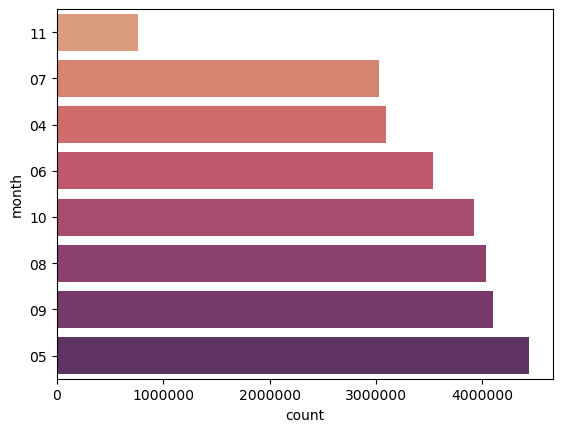

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.tight_layout()
sns.barplot(y="month",x="count",data=timeline_month[:],palette="flare")
plt.ticklabel_format(style='plain', axis='x')

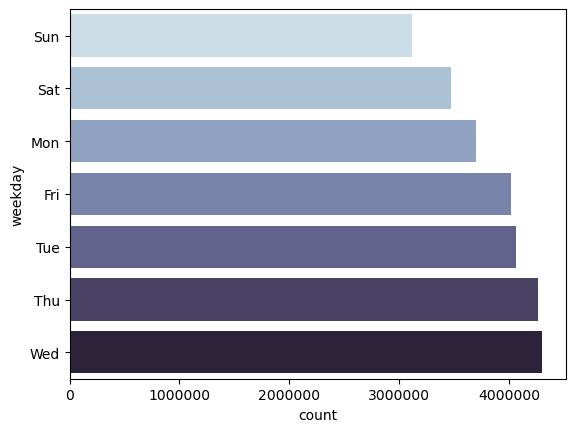

In [37]:
sns.barplot(y="weekday",x="count",data=timeline_weekday[:],palette="ch:s=.25,rot=-.25")
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='day', ylabel='count'>

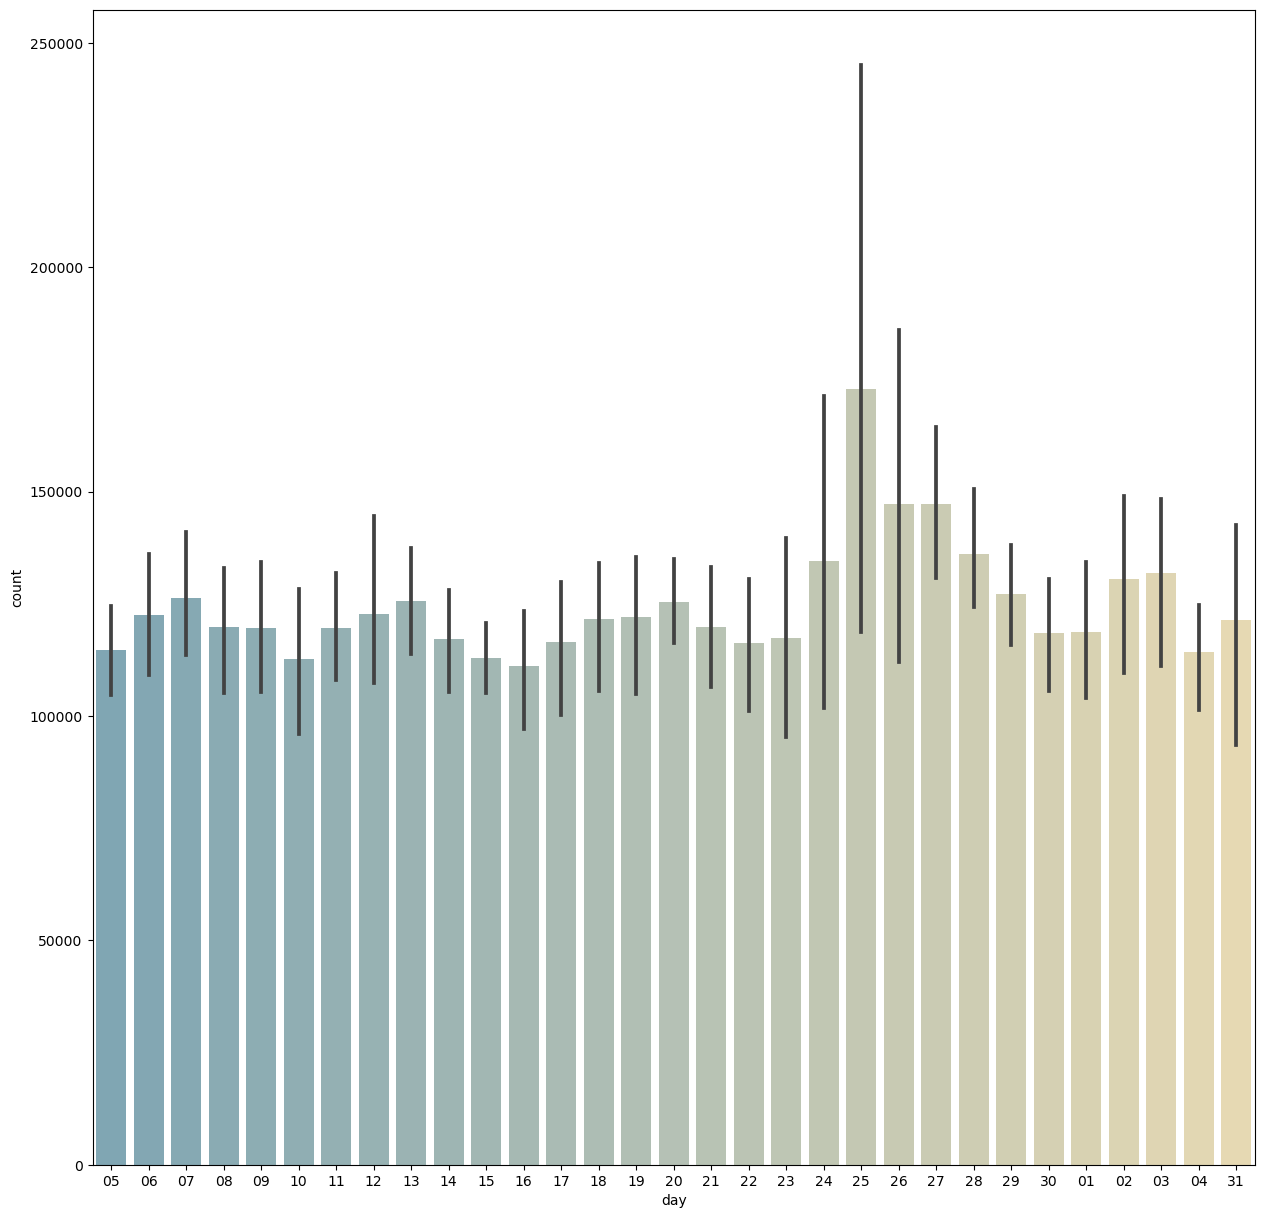

In [44]:
plt.figure(figsize=(15,15))
plt.tight_layout()
sns.barplot(x="day",y="count",data=timeline_month_day[:],palette="blend:#7AB,#EDA")
#plt.ticklabel_format(style='plain', axis='x')

In [47]:
timeline3 = timeline2.withColumn("merge", concat_ws("-", "month", "day", "year")) \
  .withColumn("date", to_date(unix_timestamp("merge", "MM-dd-yyyy").cast("timestamp"))).drop("merge")

timeline3.limit(5).toPandas()

,created_at,user,user_id,user_name,user_description,followers_count,quote_count,retweeted_status,retweet_count,favorite_count,text,verified_user,user_location,weekday,month,day,time,0000,year,date
0,Wed Aug 24 17:29:41 +0000 2022,"(False, Mon Oct 04 18:02:23 +0000 2021, True, False, Pro Medical Choice, Forest bather, Outdoors...",1445086760938127372,Kevster,"Pro Medical Choice, Forest bather, Outdoors enthusiast, Respectful.",147,11,"(None, Wed Aug 24 13:42:50 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",88,290,"RT @AndrewLawton: ""Western knows its vaccine mandate won’t protect students. The university just...",False,None,Wed,08,24,17:29:41,+0000,2022,2022-08-24
1,Wed Aug 24 17:29:42 +0000 2022,"(False, Sun Apr 26 02:15:57 +0000 2009, False, False, Visit Our New Ruined Downtown, #maga, #Ame...",35375399,Daniel Lewis,"Visit Our New Ruined Downtown, #maga, #America First\nNo d/m's",1161,5,"(None, Wed Aug 24 17:15:05 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",94,334,"RT @StephenM: Here’s what we should do re: college debt — tax university endowments, using the f...",False,Sarasota Florida,Wed,08,24,17:29:42,+0000,2022,2022-08-24
2,Wed Aug 24 17:29:42 +0000 2022,"(False, Wed Oct 13 02:30:05 +0000 2021, True, False, Check out the recent history of the grossly...",1448113670802837514,"William Turner, PhD, JD",Check out the recent history of the grossly degraded Republican Party in my new book: https://ww...,521,31,"(None, Tue Aug 23 20:14:22 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",1198,9651,"RT @fuckyouiquit: If they cancelled all student debt, made college free, and gave everyone unive...",False,"Ph.D. US History, JD",Wed,08,24,17:29:42,+0000,2022,2022-08-24
3,Wed Aug 24 17:29:42 +0000 2022,"(False, Sat Mar 19 18:51:25 +0000 2022, True, False, @SFSU ‘07 | Healing with essential oils | G...",1505255578163056644,Cari🌿,@SFSU ‘07 | Healing with essential oils | Gallbladder removed June. Supporter of HRH Princess Be...,13,0,None,0,0,@SenRonJohnson Republicans also went to college and will benefit from this announcement from POT...,False,None,Wed,08,24,17:29:42,+0000,2022,2022-08-24
4,Wed Aug 24 17:29:43 +0000 2022,"(False, Mon Jul 04 20:50:56 +0000 2022, True, False, #BreakTheSilence, 6130, 46, 45, False, 1544...",1544060980656840704,Tefera Degefu,#BreakTheSilence,46,2,"(None, Wed Aug 24 15:43:34 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",40,31,"RT @Sultan_Abagissa: The TPLF, which has no notion of peace, took advantage of the chance to for...",False,None,Wed,08,24,17:29:43,+0000,2022,2022-08-24


In [48]:
timeline_tweets = timeline3.groupby("date").count().orderBy("date").toPandas()

<AxesSubplot:xlabel='date'>

<Figure size 1500x1500 with 0 Axes>

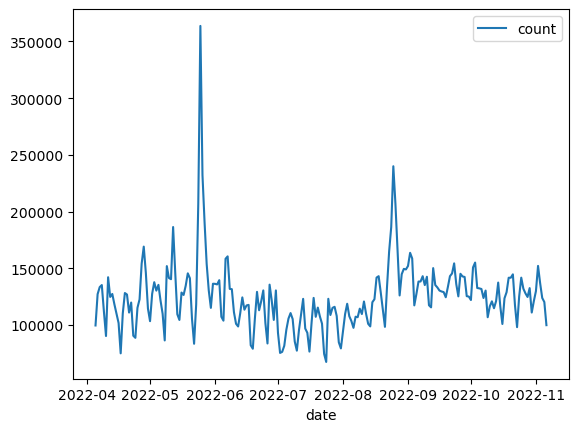

In [53]:
plt.figure(figsize=(15,15))
plt.tight_layout()
timeline_tweets.plot(kind="line",x='date', y='count')

--> We can see a huge peak in tweet count as we approach June 2022 and also at the start of September 2022

In [59]:
timeline3.write.format("parquet").mode('overwrite').save('gs://msca-bdp-students-bucket/shared_data/suyashlakhani/tweets5')